# Problem 2

The sorting code was run on NYU's hpc resource using 6 nodes with 12 processors each for a total of 72 processes. The number of samples per processor was varied between 100,000 and 12,800,000. The code for processing the output is contained below.

In [37]:
%pylab inline
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


In [38]:
def output2time(contents):
    time = contents.grep('Total Execution Time')[0]
    return float(re.search(r'\d*\.\d*', time).group(0))

def n2elapsed_time(N):

    directory = "job.N%d"%(N)
    
    contents = !cat {directory}/output.txt
    
    return output2time(contents)

In the plot below, it is clear that the length of processingt time increases with the number of samples.

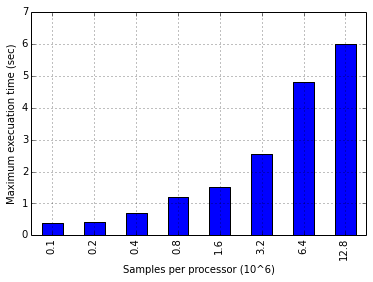

In [39]:
Ns = [100000 * tp for tp in [1, 2, 4, 8, 16, 32, 64, 128]]
times = [n2elapsed_time(N) for N in Ns]

x = pd.Series(times, index=Ns)
x.index /= 1000000

x.plot(kind='bar')
xlabel('Samples per processor (10^6)')
ylabel('Maximum execuation time (sec)')

However, in this plot is clear that the processing time per 10^6 samples decreases with additional samples. In other words, the parallel algorithm is more efficient for larger numbers of samples. This means that at some point, the serial sorting operations rather than the parallel communication becomes the bottleneck.

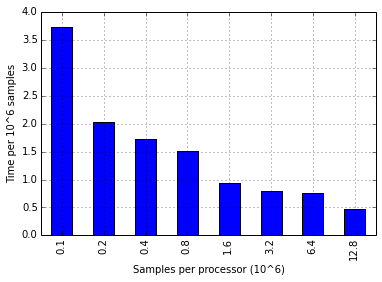

In [40]:
y = x / np.array(Ns) * 10**6
y.plot(kind='bar')
ylabel('Time per 10^6 samples')
xlabel('Samples per processor (10^6)')
